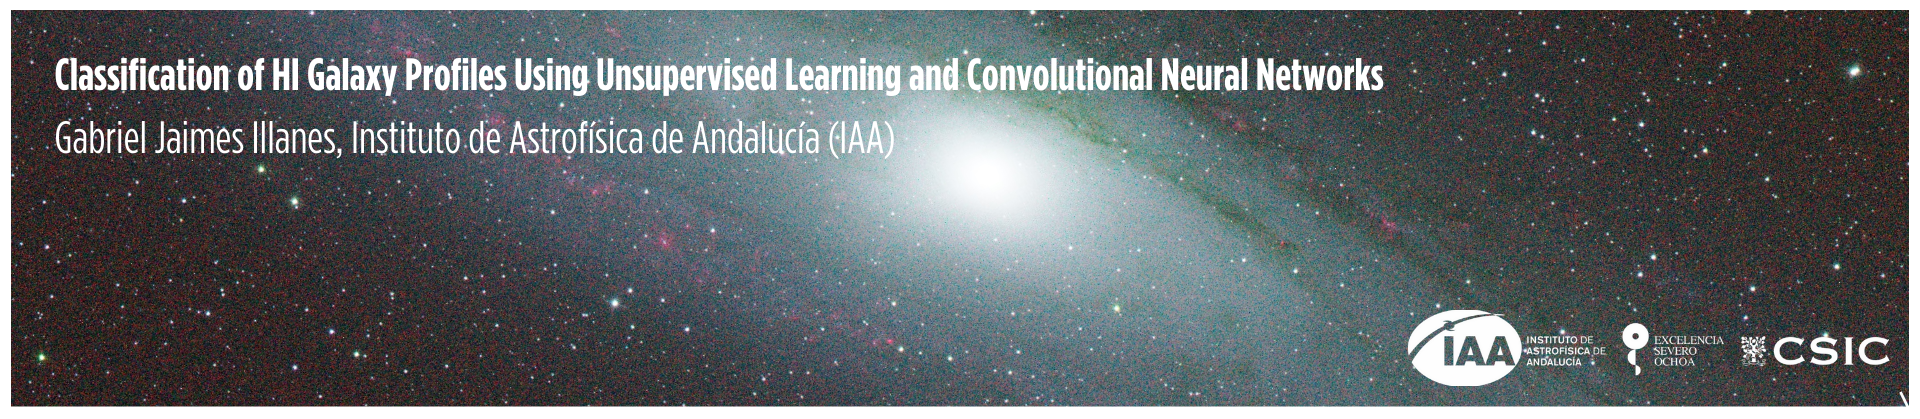

---

<div style="text-align: center;">
    <h2>VISUALIZATION OF ALL CLASIFICATIONS VS PHYSICAL PARAMETERS </h2>
</div>


---

### Step1: Data Visualization (Without filtering) | ALFALFA Catalog

This code retrieves and processes astronomical data from the ALFALFA catalog using the Vizier service. First, it downloads the data without limiting the number of rows and saves it to an Excel file. Then, it defines specific parameter ranges (which can be adjusted) for filtering the data, such as `HIflux`, `Vhel`, `Dist`, `W50`, `HI`, and `SNR`. The filtered data is then saved to a new Excel file, and descriptive statistics are computed.

After filtering, the code generates histograms for the original and filtered data, comparing six columns (`HIflux`, `Vhel`, `Dist`, `W50`, `HI`, and `SNR`). Each histogram uses 50 bins, with the original data shown in grey and the filtered data in different colors. These histograms are displayed in a grid of subplots, ensuring unused axes are turned off for a cleaner layout. Finally, the plots are displayed using Matplotlib and Seaborn, with KDE lines to show data distributions.


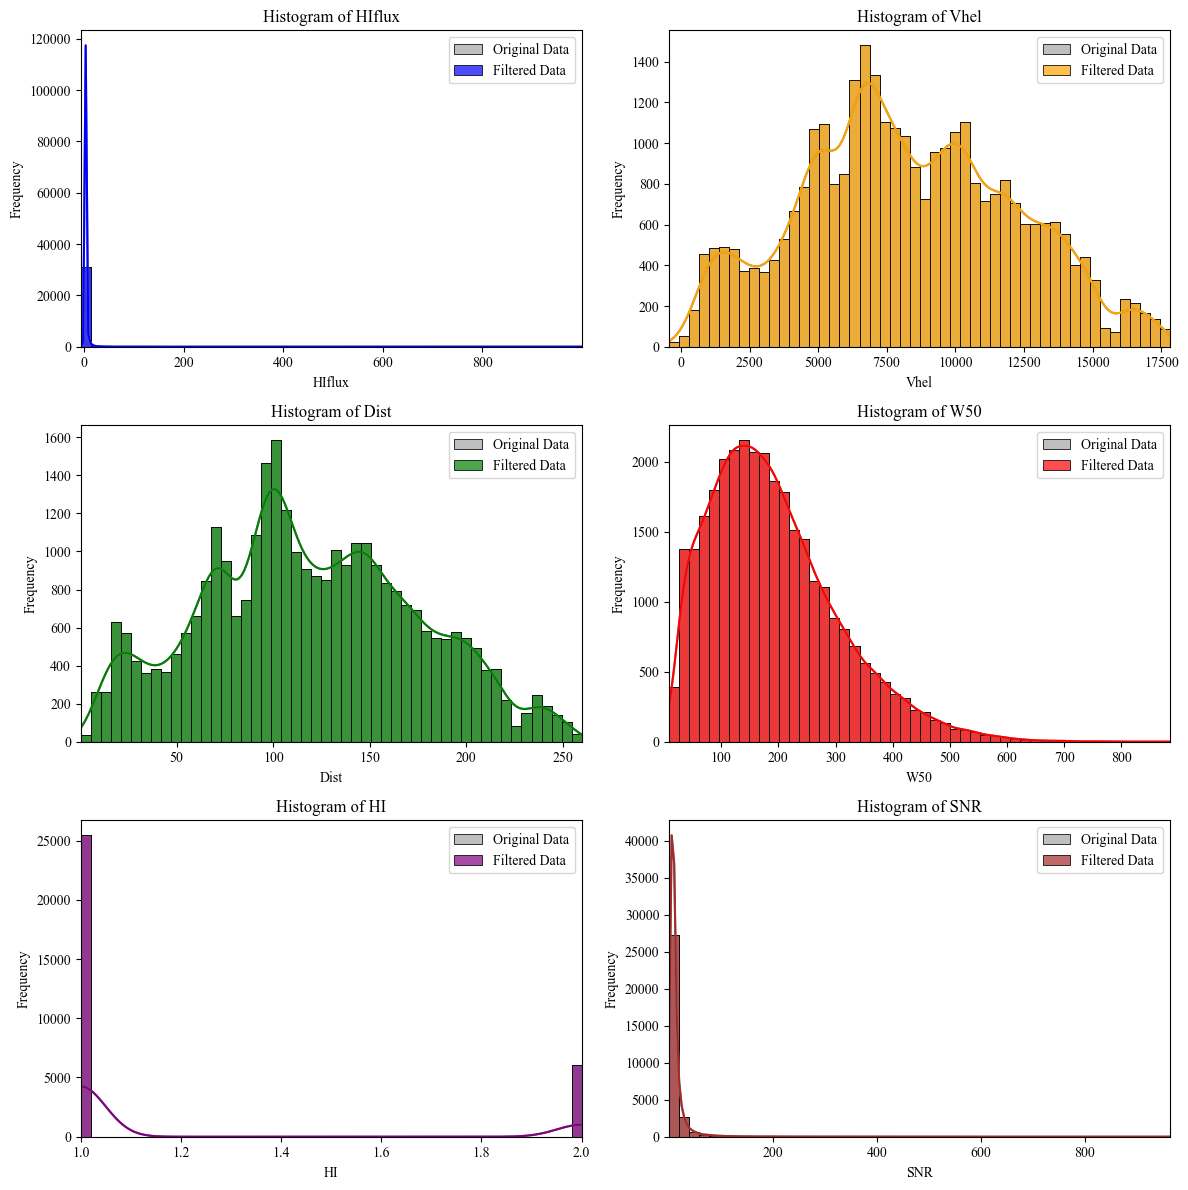

In [4]:
# 1.---------Importation of Libraries------
import seaborn as sns
import matplotlib.pyplot as plt
from astroquery.vizier import Vizier
import pandas as pd

# 2.---------Set row limit for data query------
# Setting the row limit to -1 means there will be no limit on the number of rows retrieved.
Vizier.ROW_LIMIT = -1  # -1 to not limit the number of rows obtained

# 3.---------Set font style for plots------
# Changing the font style to 'Times New Roman' for all plots.
plt.rcParams['font.family'] = 'Times New Roman'

# 4.---------ALFALFA Catalog Route------
# Define the route for the ALFALFA catalog in Vizier.
route_alfalfa = "J/ApJ/861/49/table2"

# 5.---------Retrieve the ALFALFA catalog------
# Querying Vizier to get the ALFALFA catalog data and converting it into a pandas DataFrame.
data_alfalfa = Vizier.get_catalogs(route_alfalfa)
data_alfalfa = data_alfalfa[0].to_pandas()

# 6.---------Save Data to Excel------
# Save the retrieved data into an Excel file for further analysis.
data_alfalfa.to_excel('alfalfa_data.xlsx', index=False)

# 7.---------Filtering Process Start------
# ----------Filtering-----------
# Read the data from the previously saved Excel file.
data_alfalfa = pd.read_excel('alfalfa_data.xlsx')

# 8.---------Define ranges for each parameter------
# Defining infinity range values for each of the selected parameters.
# The range can be adjusted as necessary for different use cases.
r_all = float('-inf'), float('inf')
range_filters = {
    'HIflux': (r_all),
    'Vhel': (r_all),
    'Dist': (r_all),
    'W50': (r_all),
    'HI': (r_all),
    'SNR': (r_all)
}

# 9.---------Define the number of bins for histograms------
# Number of bins for histograms can be adjusted according to the dataset.
num_bins = 50  # Adjust this value as necessary

# 10.---------Apply filters to data------
# Filter the data based on the predefined ranges for each column.
filtered_data = data_alfalfa.copy()
for column, (min_val, max_val) in range_filters.items():
    filtered_data = filtered_data[(filtered_data[column] >= min_val) & (filtered_data[column] <= max_val)]

# 11.---------Save filtered data to Excel------
# Save the filtered data to a new Excel file.
filtered_data.to_excel('filtered_data_alfalfa_2.xlsx', index=False)

# 12.---------Descriptive statistics of filtered data------
# Generate descriptive statistics for the filtered data using pandas 'describe()' method.
statistics = filtered_data.describe()

# 13.---------Create subplots and histograms------
# Create a grid of subplots to visualize histograms for the selected columns.
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

# 14.---------List of columns to plot------
# Define which columns from the data will be plotted in the histograms.
columns_to_plot = ['HIflux', 'Vhel', 'Dist', 'W50', 'HI', 'SNR']

# 15.---------Define colors for each column plot------
# Set specific colors for each column’s histogram to differentiate them.
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# 16.---------Generate histograms------
# Loop through the columns and create histograms for both the original and filtered data.
for i, column in enumerate(columns_to_plot):
    # Define the min and max values of the data for setting plot limits.
    data_min, data_max = data_alfalfa[column].min(), data_alfalfa[column].max()
    # Create bins for the histogram based on the number of bins.
    bins = pd.cut(data_alfalfa[column], bins=num_bins, retbins=True)[1]
    
    # Plot the original data as a histogram with grey color.
    sns.histplot(data=data_alfalfa, x=column, ax=axes[i], bins=bins, kde=True, color='grey', label='Original Data', alpha=0.5)
    # Plot the filtered data as a histogram with the assigned color.
    sns.histplot(data=filtered_data, x=column, ax=axes[i], bins=bins, kde=True, color=colors[i], label='Filtered Data', alpha=0.7)
    
    # Set plot limits, title, and labels for the histogram.
    axes[i].set_xlim(data_min, data_max)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

# 17.---------Disable unused axes------
# If there are any unused subplots, hide their axes.
for j in range(len(columns_to_plot), len(axes)):
    axes[j].axis('off')

# 18.---------Adjust layout and show plot------
# Use tight_layout to ensure plots are well spaced and show the final plot.
plt.tight_layout()
plt.show()


---

### Ste2 1: Retrieving, Filtering, and Visualizinof x1 Classification | ALFALFAts

This script begins by retrieving astronomical data from the ALFALFA catalog through the Vizier service, saving the raw data into an Excel file. It then applies predefined filters to various columns (`HIflux`, `Vhel`, `Dist`, `W50`, `HI`, and `SNR`), with adjustable ranges, and saves the filtered data into a new file. Additionally, the script reads classification results from external files, allowing for further analysis based on clustering and classification methods such as k-means, spectral clustering, and random forests.

After filtering, the code generates histograms for both the original and filtered datasets, visualizing key parameters in a 3x2 grid. The original data is plotted in grey, while filtered data is overlaid in specific colors. Classification data is also added to each histogram, with unique classes displayed in separate shades. Finally, the plots are rendered with Seaborn and Matplotlib, with kernel density estimation (KDE) to highlight data distribution, and unused subplots are hidden for a clean layout.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12676\3617354539.py:115: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[i].set_xlim(data_min, data_max)


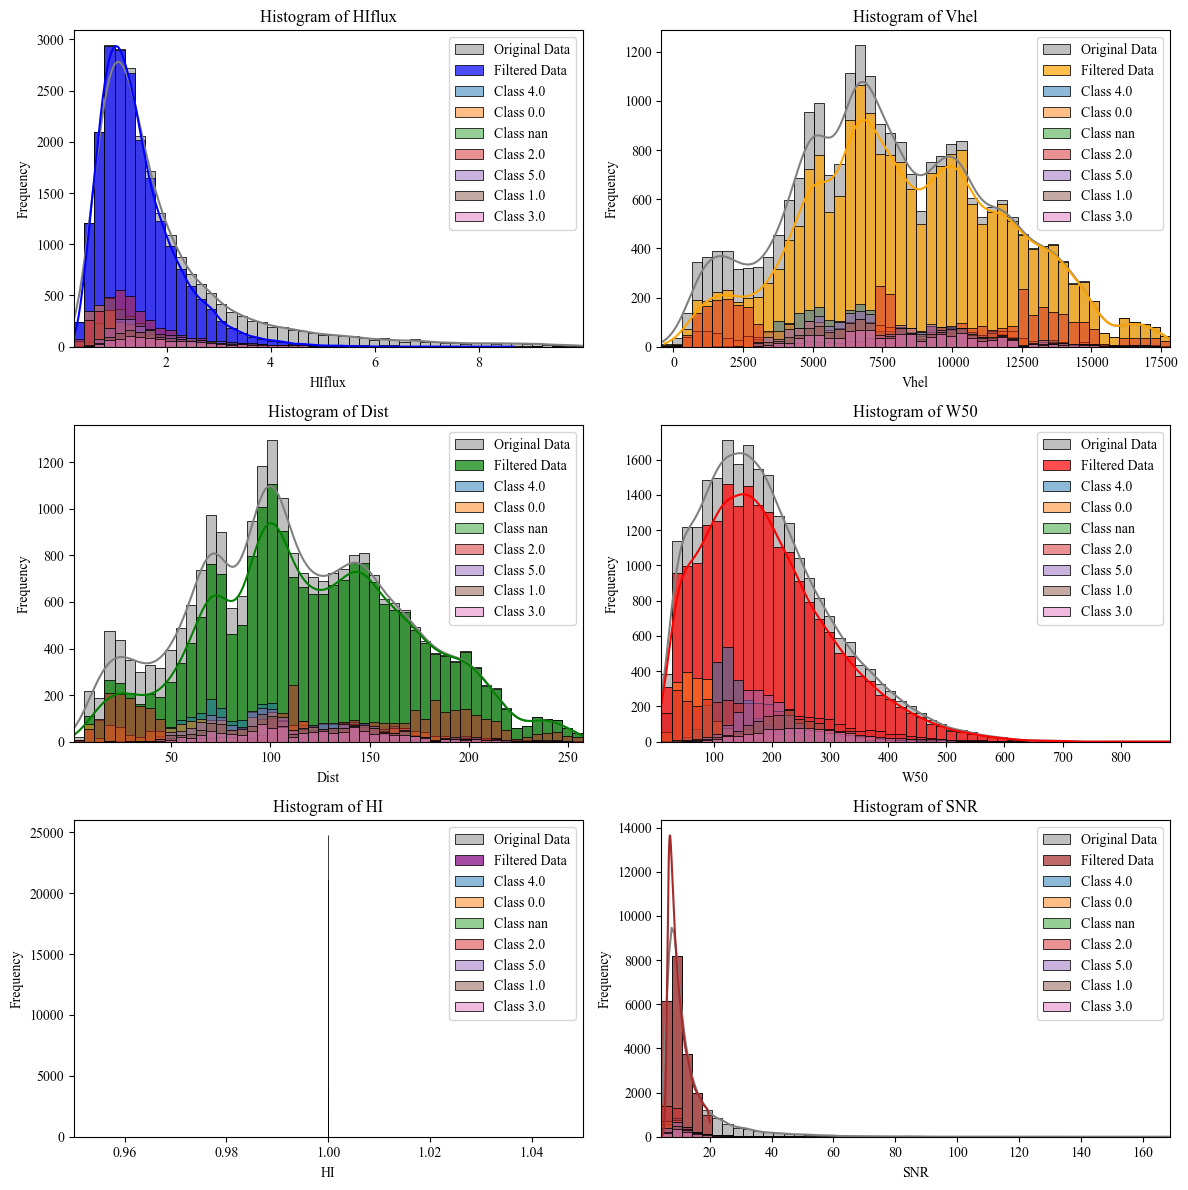

In [12]:
# 1.---------Importation of Libraries------
import seaborn as sns
import matplotlib.pyplot as plt
from astroquery.vizier import Vizier
import pandas as pd

# 2.---------Set row limit for data query------
# Setting the row limit to -1 means there will be no limit on the number of rows retrieved.
Vizier.ROW_LIMIT = -1  # -1 to not limit the number of rows obtained

# 3.---------Set font style for plots------
# Changing the font style to 'Times New Roman' for all plots.
plt.rcParams['font.family'] = 'Times New Roman'

# 4.---------ALFALFA Catalog Route------
# Define the route for the ALFALFA catalog in Vizier.
route_alfalfa = "J/ApJ/861/49/table2"

# 5.---------Retrieve the ALFALFA catalog------
# Querying Vizier to get the ALFALFA catalog data and converting it into a pandas DataFrame.
data_alfalfa = Vizier.get_catalogs(route_alfalfa)
data_alfalfa = data_alfalfa[0].to_pandas()

# 6.---------Save Data to Excel------
# Save the retrieved data into an Excel file for further analysis.
data_alfalfa.to_excel('alfalfa_data.xlsx', index=False)

# 7.---------Filtering Process Start------
# Read the filtered data from the previously saved Excel file.
data_alfalfa = pd.read_excel('filtered_data_alfalfa_1.xlsx')

# 8.---------Read classified data------
# Load the classification results from an external Excel file for further analysis.
classified_data = pd.read_excel('D:/1. JAE Intro ICU/Classification/KNN_Regular_Shapelets/filtered_data_alfalfa_classification_results_shapelets_k_means_2.xlsx')

"""
9.---------Classification and Clustering Method Paths------
Classification:
D:/1. JAE Intro ICU/Classification/KNN_Regular_Shapelets/filtered_data_alfalfa_classification_results_shapelets_
D:/1. JAE Intro ICU/Classification/SVM_Shapelets/filtered_data_alfalfa_classification_SVM_results_shapelets_
D:/1. JAE Intro ICU/Classification/Random_Forest_Shapelets/filtered_data_alfalfa_classification_Random_Forest_results_shapelets_

Clustering: 
k_means
spectral_clustering
DBSCAN
AgglomerativeClustering
AffinityPropagation
GaussianMixture
"""

# 10.---------Define ranges for each parameter------
# Defining infinity range values for most parameters, with a specific range for SNR.
r_all = float('-inf'), float('inf')
range_filters = {
    'HIflux': r_all,
    'Vhel': r_all,
    'Dist': r_all,
    'W50': r_all,
    'HI': r_all,
    'SNR': (0, 20)  # Set a specific range for SNR
}

# 11.---------Define the number of bins for histograms------
# Number of bins for histograms can be adjusted according to the dataset.
num_bins = 50  # Adjust this value as necessary

# 12.---------Apply filters to data------
# Filter the data based on the predefined ranges for each column.
filtered_data = data_alfalfa.copy()
for column, (min_val, max_val) in range_filters.items():
    filtered_data = filtered_data[(filtered_data[column] >= min_val) & (filtered_data[column] <= max_val)]

# 13.---------Save filtered data to Excel------
# Save the filtered data to a new Excel file.
filtered_data.to_excel('filtered_data_alfalfa_2.xlsx', index=False)

# 14.---------Descriptive statistics of filtered data------
# Generate descriptive statistics for the filtered data using pandas 'describe()' method.
statistics = filtered_data.describe()

# 15.---------Create subplots and histograms------
# Create a grid of subplots to visualize histograms for the selected columns.
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

# 16.---------List of columns to plot------
# Define which columns from the data will be plotted in the histograms.
columns_to_plot = ['HIflux', 'Vhel', 'Dist', 'W50', 'HI', 'SNR']

# 17.---------Define colors for each column plot------
# Set specific colors for each column’s histogram to differentiate them.
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

# 18.---------Generate histograms------
# Loop through the columns and create histograms for both the original and filtered data.
for i, column in enumerate(columns_to_plot):
    # Define the min and max values of the data for setting plot limits.
    data_min, data_max = data_alfalfa[column].min(), data_alfalfa[column].max()
    # Create bins for the histogram based on the number of bins.
    bins = pd.cut(data_alfalfa[column], bins=num_bins, retbins=True)[1]
    
    # Plot the original data as a histogram with grey color.
    sns.histplot(data=data_alfalfa, x=column, ax=axes[i], bins=bins, kde=True, color='grey', label='Original Data', alpha=0.5)
    # Plot the filtered data as a histogram with the assigned color.
    sns.histplot(data=filtered_data, x=column, ax=axes[i], bins=bins, kde=True, color=colors[i], label='Filtered Data', alpha=0.7)
    
    # 19.---------Add classified data to histograms------
    # Loop through unique classification labels and add the classified data to the plot.
    for class_label in classified_data['Classification'].unique():
        class_data = classified_data[classified_data['Classification'] == class_label]
        sns.histplot(data=class_data, x=column, ax=axes[i], bins=bins, kde=False, label=f'Class {class_label}', alpha=0.5)
    
    # Set plot limits, title, and labels for the histogram.
    axes[i].set_xlim(data_min, data_max)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

# 20.---------Disable unused axes------
# If there are any unused subplots, hide their axes.
for j in range(len(columns_to_plot), len(axes)):
    axes[j].axis('off')

# 21.---------Adjust layout and show plot------
# Use tight_layout to ensure plots are well spaced and show the final plot.
plt.tight_layout()
plt.show()


### Step 3: Retrieving, Filtering, and Visualizing x(ALL) Classification Results | ALFALFA Catalog

This script retrieves astronomical data from the ALFALFA catalog using the Vizier service, initially saving the raw data to an Excel file. Predefined filters are applied to key parameters (`HIflux`, `Vhel`, `Dist`, `W50`, `HI`, and `SNR`) with adjustable ranges, and the filtered data is saved to a separate file. The script also processes classification results from multiple methods such as k-means, spectral clustering, and random forests, sourced from external Excel files.

Histograms for key parameters are then generated in a 3x2 grid. The original dataset and filtered data are plotted with different colors, while classification results are overlaid with distinct shades representing various classes. The histograms are rendered using Seaborn and Matplotlib, and the figures are saved to a multi-page PDF document. Titles and legends enhance readability, and unused subplots are disabled for a clear, concise visual presentation.

i. Includes Original ALFALFA Catalog data:

In [18]:
# 1.---------Importing Required Libraries------
import seaborn as sns
import matplotlib.pyplot as plt
from astroquery.vizier import Vizier
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

# 2.---------Configuring Vizier Parameters------
# Configure the desired row limit for Vizier queries (-1 means no limit)
Vizier.ROW_LIMIT = -1  
plt.rcParams['font.family'] = 'Times New Roman'  # Set the font for plots

# 3.---------Retrieving ALFALFA Catalog Data------
# Define the path to the ALFALFA catalog in Vizier
route_alfalfa = "J/ApJ/861/49/table2"

# Retrieve the catalog using Vizier and convert to a pandas DataFrame
data_alfalfa = Vizier.get_catalogs(route_alfalfa)
data_alfalfa = data_alfalfa[0].to_pandas()

# Save the raw ALFALFA data to an Excel file
data_alfalfa.to_excel('alfalfa_data.xlsx', index=False)

# 4.---------Filtering the ALFALFA Data------
# Read previously filtered ALFALFA data from an Excel file
data_alfalfa = pd.read_excel('filtered_data_alfalfa_1.xlsx')

# 5.---------Defining Classification and Clustering Methods------
# List of classification directories and clustering methods to be used
directories = ["KNN_Regular_Shapelets", "SVM_Shapelets", "Random_Forest_Shapelets"]
clustering_methods = ["k_means", "spectral_clustering", "DBSCAN", "AgglomerativeClustering", "AffinityPropagation", "GaussianMixture"]

# Define the range filters for the ALFALFA parameters
r_all = float('-inf'), float('inf')  # Allow all values within these limits
range_filters = {
    'HIflux': r_all,
    'Vhel': r_all,
    'Dist': r_all,
    'W50': r_all,
    'HI': r_all,
    'SNR': (0, 20)  # Limiting SNR to between 0 and 20
}

num_bins = 50  # Define the number of bins for histograms

# 6.---------Applying Filters to the Data------
# Make a copy of the original data and apply the defined filters
filtered_data = data_alfalfa.copy()
for column, (min_val, max_val) in range_filters.items():
    filtered_data = filtered_data[(filtered_data[column] >= min_val) & (filtered_data[column] <= max_val)]

# Save the filtered data to an Excel file
filtered_data.to_excel('filtered_data_alfalfa_2.xlsx', index=False)

# 7.---------Descriptive Statistics------
# Generate descriptive statistics of the filtered DataFrame
statistics = filtered_data.describe()

# 8.---------Iterative Plotting and Saving------
# Define the path to save the PDF containing the plots
pdf_path = 'classification_results_plots.pdf'

# Open a PDF to save multiple figures
with PdfPages(pdf_path) as pdf:
    for directory in directories:
        for method in clustering_methods:
            # Construct the path for classified data based on directory and method
            file_path = f'D:/1. JAE Intro ICU/Classification/{directory}/filtered_data_alfalfa_classification_results_shapelets_{method}_2.xlsx'
            
            # Adjust file paths for specific directories
            if directory == "Random_Forest_Shapelets":
                file_path = file_path.replace('results_shapelets', 'Random_Forest_results_shapelets')
            elif directory == "SVM_Shapelets":
                file_path = file_path.replace('results_shapelets', 'SVM_results_shapelets')

            # Read the classified data from the constructed path
            classified_data = pd.read_excel(file_path)

            # 9.---------Creating Subplots for Visualization------
            fig, axes = plt.subplots(3, 2, figsize=(12, 12))
            axes = axes.flatten()  # Flatten axes array for easy iteration

            columns_to_plot = ['HIflux', 'Vhel', 'Dist', 'W50', 'HI', 'SNR']  # Parameters to visualize

            # Define color palette for histograms
            colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

            # 10.---------Generating Histograms for Each Column------
            for i, column in enumerate(columns_to_plot):
                # Calculate the min and max values of each column
                data_min, data_max = data_alfalfa[column].min(), data_alfalfa[column].max()
                # Generate bins for histograms
                bins = pd.cut(data_alfalfa[column], bins=num_bins, retbins=True)[1]
                
                # Plot the original and filtered data as histograms
                sns.histplot(data=data_alfalfa, x=column, ax=axes[i], bins=bins, kde=True, color='grey', label='Original Data', alpha=0.5)
                sns.histplot(data=filtered_data, x=column, ax=axes[i], bins=bins, kde=True, color=colors[i], label='Filtered Data', alpha=0.7)
                
                # 11.---------Adding Classified Data to the Histograms------
                for class_label in classified_data['Classification'].unique():
                    class_data = classified_data[classified_data['Classification'] == class_label]
                    sns.histplot(data=class_data, x=column, ax=axes[i], bins=bins, kde=False, label=f'Class {class_label}', alpha=0.5)
                
                # Set axis limits and labels for each subplot
                axes[i].set_xlim(data_min, data_max)
                axes[i].set_title(f'Histogram of {column}')
                axes[i].set_xlabel(column)
                axes[i].set_ylabel('Frequency')
                axes[i].legend()

            # Disable unused axes
            for j in range(len(columns_to_plot), len(axes)):
                axes[j].axis('off')

            # Set a title for the figure
            fig.suptitle(f'Classification: {directory}, Clustering Method: {method}', fontsize=16)

            # Adjust layout and save the figure to the PDF
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])
            pdf.savefig(fig)  # Save the figure to the PDF
            plt.close(fig)  # Close the figure to free memory


C:\Users\Usuario\AppData\Local\Temp\ipykernel_12676\3247314259.py:105: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[i].set_xlim(data_min, data_max)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12676\3247314259.py:105: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[i].set_xlim(data_min, data_max)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12676\3247314259.py:105: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[i].set_xlim(data_min, data_max)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12676\3247314259.py:105: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[i].set_xlim(data_min, data_max)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12676\3247314259.py:105: UserWarning: Attempting t

ii. Only classifications obtained:

In [19]:
# 1.---------Importing Libraries------
import seaborn as sns  # For creating statistical plots
import matplotlib.pyplot as plt  # For plotting and visualizing data
from astroquery.vizier import Vizier  # To query astronomical catalogs
import pandas as pd  # For data manipulation and analysis
from matplotlib.backends.backend_pdf import PdfPages  # To save plots in a PDF file

# 2.---------Configuring Vizier Row Limit------
# Set the desired row limit
Vizier.ROW_LIMIT = -1  # -1 means no limit on the number of rows fetched
plt.rcParams['font.family'] = 'Times New Roman'  # Set the font style for the plots

# 3.---------Path to ALFALFA Catalog------
# Define the path for the ALFALFA catalog
route_alfalfa = "J/ApJ/861/49/table2"

# 4.---------Retrieving Catalog Data------
# Fetch the ALFALFA catalog using the specified route
data_alfalfa = Vizier.get_catalogs(route_alfalfa)
data_alfalfa = data_alfalfa[0].to_pandas()  # Convert the catalog to a Pandas DataFrame

# 5.---------Saving Catalog Data------
# Save the fetched data to an Excel file
data_alfalfa.to_excel('alfalfa_data.xlsx', index=False)

# ----------Filtering-----------

# 6.---------Reading Filtered Data------
# Load the filtered data from a previously saved Excel file
data_alfalfa = pd.read_excel('filtered_data_alfalfa_1.xlsx')

# 7.---------Defining Classification Directories------
# Define the directories for classification methods
directories = ["KNN_Regular_Shapelets", "SVM_Shapelets", "Random_Forest_Shapelets"]

# 8.---------Defining Clustering Methods------
# Specify the different clustering methods to be applied
clustering_methods = ["k_means", "spectral_clustering", "DBSCAN", "AgglomerativeClustering", 
                      "AffinityPropagation", "GaussianMixture"]

# 9.---------Parameter Ranges for Filtering------
# Define ranges for each parameter (can be adjusted)
r_all = float('-inf'), float('inf')  # Represents no limit for filtering
range_filters = {
    'HIflux': r_all,
    'Vhel': r_all,
    'Dist': r_all,
    'W50': r_all,
    'HI': r_all,
    'SNR': (0, 20)  # SNR is constrained between 0 and 20
}

# 10.---------Number of Bins for Histograms------
num_bins = 50  # Number of bins for histograms (adjustable)

# 11.---------Applying Data Filters------
# Filter the data according to the specified parameter ranges
filtered_data = data_alfalfa.copy()
for column, (min_val, max_val) in range_filters.items():
    filtered_data = filtered_data[(filtered_data[column] >= min_val) & (filtered_data[column] <= max_val)]

# 12.---------Saving Filtered Data------
# Save the filtered data to an Excel file
filtered_data.to_excel('filtered_data_alfalfa_ALL.xlsx', index=False)

# 13.---------Descriptive Statistics------
# Generate descriptive statistics for the filtered DataFrame
statistics = filtered_data.describe()

# 14.---------Generating and Saving Classification Results------
# Define the path for saving the plots in a PDF
pdf_path = 'classification_results_plots_ALL.pdf'

# 15.---------Iterating Through Directories and Clustering Methods------
# Create a PDF document to save the plots
with PdfPages(pdf_path) as pdf:
    for directory in directories:  # Loop over classification directories
        for method in clustering_methods:  # Loop over clustering methods
            
            # 16.---------Building the File Path for Classified Data------
            # Construct the path for the classified data files based on the method
            file_path = f'D:/1. JAE Intro ICU/Classification/{directory}/filtered_data_alfalfa_classification_results_shapelets_{method}_2.xlsx'
            
            # Handle special cases for specific directories
            if directory == "Random_Forest_Shapelets":
                file_path = file_path.replace('results_shapelets', 'Random_Forest_results_shapelets')
            elif directory == "SVM_Shapelets":
                file_path = file_path.replace('results_shapelets', 'SVM_results_shapelets')

            # 17.---------Reading Classified Data------
            # Read the classified data for the current directory and method
            classified_data = pd.read_excel(file_path)

            # 18.---------Creating Subplots------
            # Create a grid of 3x2 subplots for visualizing the histograms
            fig, axes = plt.subplots(3, 2, figsize=(12, 12))
            axes = axes.flatten()  # Flatten the grid to make iteration easier

            # 19.---------Columns to Plot------
            # Specify the columns to plot histograms for
            columns_to_plot = ['HIflux', 'Vhel', 'Dist', 'W50', 'HI', 'SNR']

            # 20.---------Colors for Each Plot------
            # Define colors for each column's histogram
            colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

            # 21.---------Creating Histograms------
            # Loop over each column to plot histograms
            for i, column in enumerate(columns_to_plot):
                data_min, data_max = data_alfalfa[column].min(), data_alfalfa[column].max()  # Get the data range
                bins = pd.cut(data_alfalfa[column], bins=num_bins, retbins=True)[1]  # Define the bins for the histogram

                # Add histograms for classified data based on different class labels
                for class_label in classified_data['Classification'].unique():
                    class_data = classified_data[classified_data['Classification'] == class_label]
                    sns.histplot(data=class_data, x=column, ax=axes[i], bins=bins, kde=False, label=f'Class {class_label}', alpha=0.5)

                # Set the limits, titles, and labels for the axes
                axes[i].set_xlim(data_min, data_max)
                axes[i].set_title(f'Histogram of {column}')
                axes[i].set_xlabel(column)
                axes[i].set_ylabel('Frequency')
                axes[i].legend()

            # 22.---------Disabling Unused Axes------
            # Turn off axes that are not being used for plots
            for j in range(len(columns_to_plot), len(axes)):
                axes[j].axis('off')

            # 23.---------Figure Title and Layout------
            # Set the title for the entire figure
            fig.suptitle(f'Classification: {directory}, Clustering Method: {method}', fontsize=16)

            # Adjust the layout to prevent overlap
            plt.tight_layout(rect=[0, 0.03, 1, 0.95])

            # 24.---------Save the Current Figure to the PDF------
            # Save the current figure to the PDF document
            pdf.savefig(fig)
            plt.close(fig)  # Close the figure to release memory


C:\Users\Usuario\AppData\Local\Temp\ipykernel_12676\237844678.py:119: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[i].set_xlim(data_min, data_max)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12676\237844678.py:119: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[i].set_xlim(data_min, data_max)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12676\237844678.py:119: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[i].set_xlim(data_min, data_max)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12676\237844678.py:119: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[i].set_xlim(data_min, data_max)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_12676\237844678.py:119: UserWarning: Attempting to set